In [1]:
import matplotlib.pyplot as plt
import numpy as np
from joblib import Parallel, delayed

import Expectation_EulerCharacteristic as EEC

In [2]:
output = Parallel(n_jobs=8, verbose=9)(
    delayed(EEC.sphere.euler_characteristic)(2, 2, np.linspace(0, np.pi*2, 1000))
    for _ in range(100000)
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    2.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    2.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Done  81 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Done 230 tasks      | elapsed:    2.3s
[Parallel(n_jobs=8)]: Done 776 tasks      | elapsed:    2.5s
[Parallel(n_jobs=8)]: Done 3336 tasks      | elapsed:    3.3s
[Parallel(n_jobs=8)]: Done 12296 tasks      | elapsed:    5.0s
[Parallel(n_jobs=8)]: Done 23048 tasks      | elapsed:    7.2s
[Parallel(n_jobs=8)]: Done 34824 tasks      | elapsed:    9.1s
[Parallel(n_jobs=8)]: Done 47624 tasks      | elapsed:   11.6s
[Parallel(n_jobs=8)]: Done 61448 tasks      | elapsed:   14.0s
[Parallel(n_jobs=8)]: Done 76296 tasks      | elapsed:   16.7s
[Parallel(n_jobs=8)]: Done 92168 tasks      | elapsed:   19.2s
[Parallel(n_jobs=8)]: Done 99194 tasks      | elapsed:  

In [3]:
output = np.asarray([el for el in output if el is not None])
print(output.shape)

(100000, 1000)


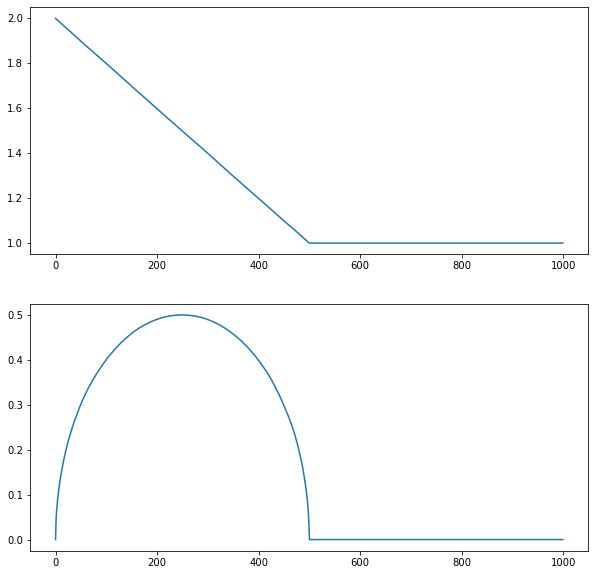

In [4]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
axs[0].plot(
    output.mean(axis=0)
)
axs[1].plot(
    output.std(axis=0)
)
plt.show()

In [5]:
output = Parallel(n_jobs=8, verbose=9)(
    delayed(EEC.sphere.euler_characteristic)(10, 2, np.linspace(0, np.pi, 1000))
    for _ in range(100000)
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 560 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 2032 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 6384 tasks      | elapsed:    2.3s
[Parallel(n_jobs=8)]: Done 11248 tasks      | elapsed:    3.6s
[Parallel(n_jobs=8)]: Done 16624 tasks      | elapsed:    5.6s
[Parallel(n_jobs=8)]: Done 22512 tasks      | elapsed:    7.6s
[Parallel(n_jobs=8)]: Done 28912 tasks      | elapsed:   10.2s
[Parallel(n_jobs=8)]: Done 35824 tasks      | elapsed:   12.5s
[Parallel(n_jobs=8)]: Done 43248 tasks      | elapsed:   15.2s
[Parallel(n_jobs=8)]: Done 51184 tasks      | elapsed:   17.5s
[Parallel(n_jobs=8)]: Done 59632 tasks      | elapsed: 

In [6]:
output = np.asarray([el for el in output if el is not None])
print(output.shape)

(100000, 1000)


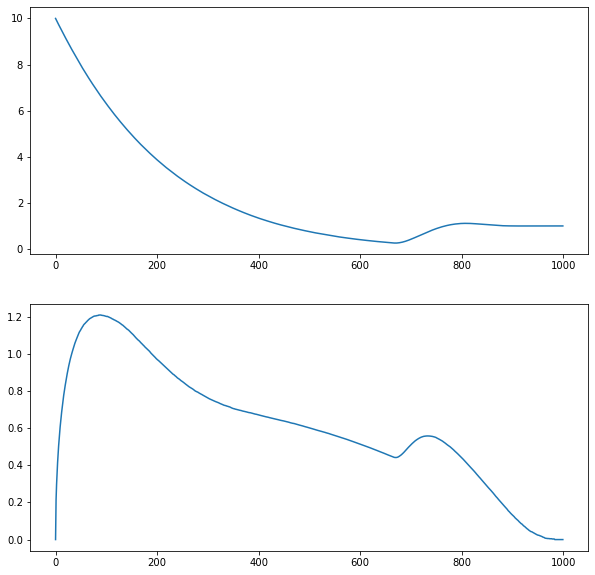

In [7]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
axs[0].plot(
    output.mean(axis=0)
)
axs[1].plot(
    output.std(axis=0)
)
plt.show()

In [8]:
np.save('ECC_sphere.npy', output)

In [9]:
output = Parallel(n_jobs=8, verbose=9)(
    delayed(EEC.torus.euler_characteristic)(10, np.linspace(0, np.sqrt(2) / 2, 1000))
    for _ in range(100000)
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 216 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 776 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 1864 tasks      | elapsed:    2.8s
[Parallel(n_jobs=8)]: Done 3080 tasks      | elapsed:    4.3s
[Parallel(n_jobs=8)]: Done 4424 tasks      | elapsed:    6.0s
[Parallel(n_jobs=8)]: Done 5896 tasks      | elapsed:    7.8s
[Parallel(n_jobs=8)]: Done 7496 tasks      | elapsed:    9.9s
[Parallel(n_jobs=8)]: Done 9224 tasks      | elapsed:   11.8s
[Parallel(n_jobs=8)]: Done 11080 tasks      | elapsed:   13.8s
[Parallel(n_jobs=8)]: Done 13064 tasks      | elapsed:   16.0s
[Parallel(n_jobs=8)]: Done 15176 tasks      | elapsed:   18.3

In [10]:
output = np.asarray([el for el in output if el is not None])
print(output.shape)

(100000, 1000)


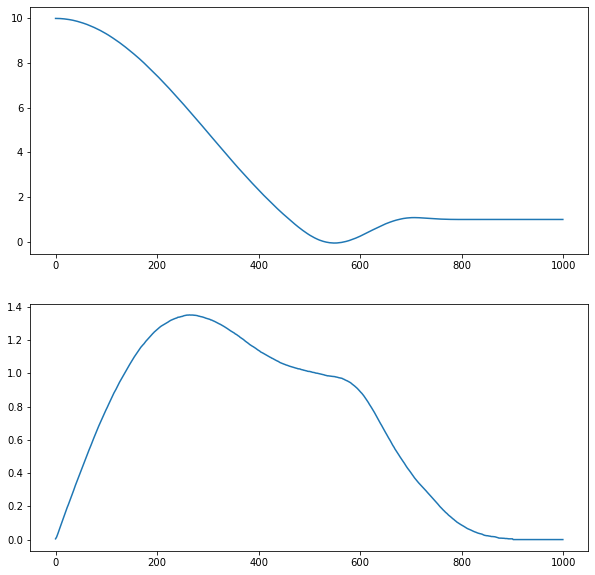

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
axs[0].plot(
    output.mean(axis=0)
)
axs[1].plot(
    output.std(axis=0)
)
plt.show()

In [12]:
np.save('ECC_torus.npy', output)